In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
athletes = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
main = pd.merge(athletes, regions, on='NOC', how='left')
main.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
main.set_index('ID', inplace=True)

In [7]:
main.isnull().sum()


Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [8]:
main.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [9]:
datatypes = main.dtypes
datatypes

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [10]:
medals = main[main['Medal'].notna()]
medal_counts = medals.groupby('region')['Medal'].count().reset_index()
medal_counts = medal_counts.sort_values(by='Medal', ascending=False)
medal_counts.columns=['Country', 'MedalCount']
medal_counts.reset_index(drop=True, inplace=True)
medal_counts.index += 1
medal_counts.head(10)

,Country,MedalCount
1,USA,5637
2,Russia,3947
3,Germany,3756
4,UK,2068
5,France,1777
6,Italy,1637
7,Sweden,1536
8,Canada,1352
9,Australia,1349
10,Hungary,1135


<Axes: xlabel='Country', ylabel='count'>

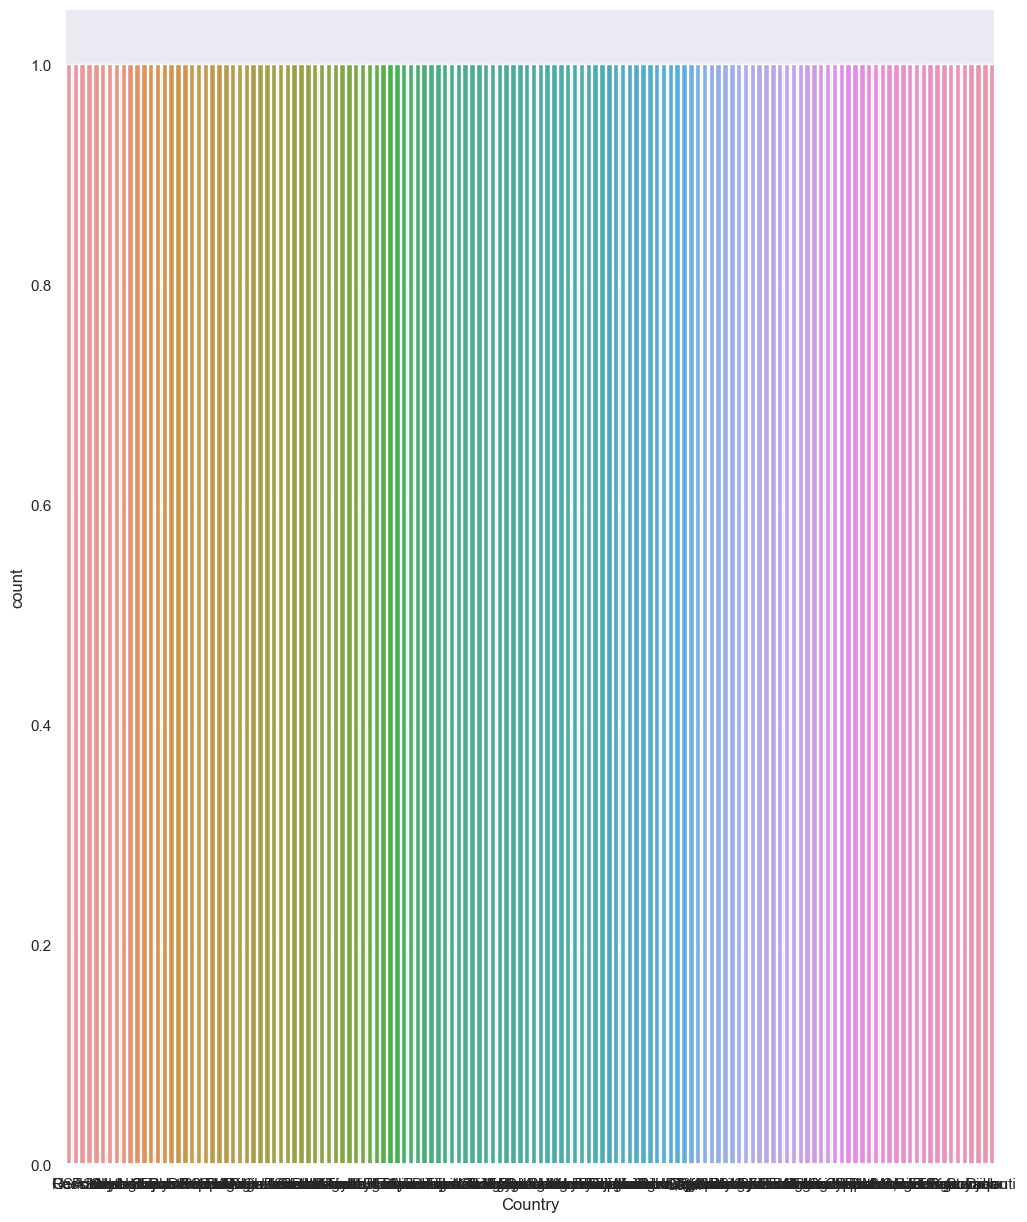

In [39]:
plt.figure(figsize=(12, 15)) 
sns.countplot(data=medal_counts, x='Country')

Pradėkime pasižiūrėdami kokios sporto šakos dominavo per visą Olimpinių žaidinių istoriją. Tam, suformuokime subsetą 'disciplines', susumuokime kiekvieną sport šaką ir nusibrėžkime stulpelinę diagramą. 

In [27]:
disciplines = main['Sport'].value_counts().reset_index()
disciplines.columns = ['Discipline', 'Occurance']
disciplines.index += 1

In [88]:
def annotate_bars(barplot, fontsize, color):
    for bar in barplot.patches:
        barplot.annotate(f'{bar.get_width():.0f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                         ha='left', va='center', fontsize=fontsize, color=color)


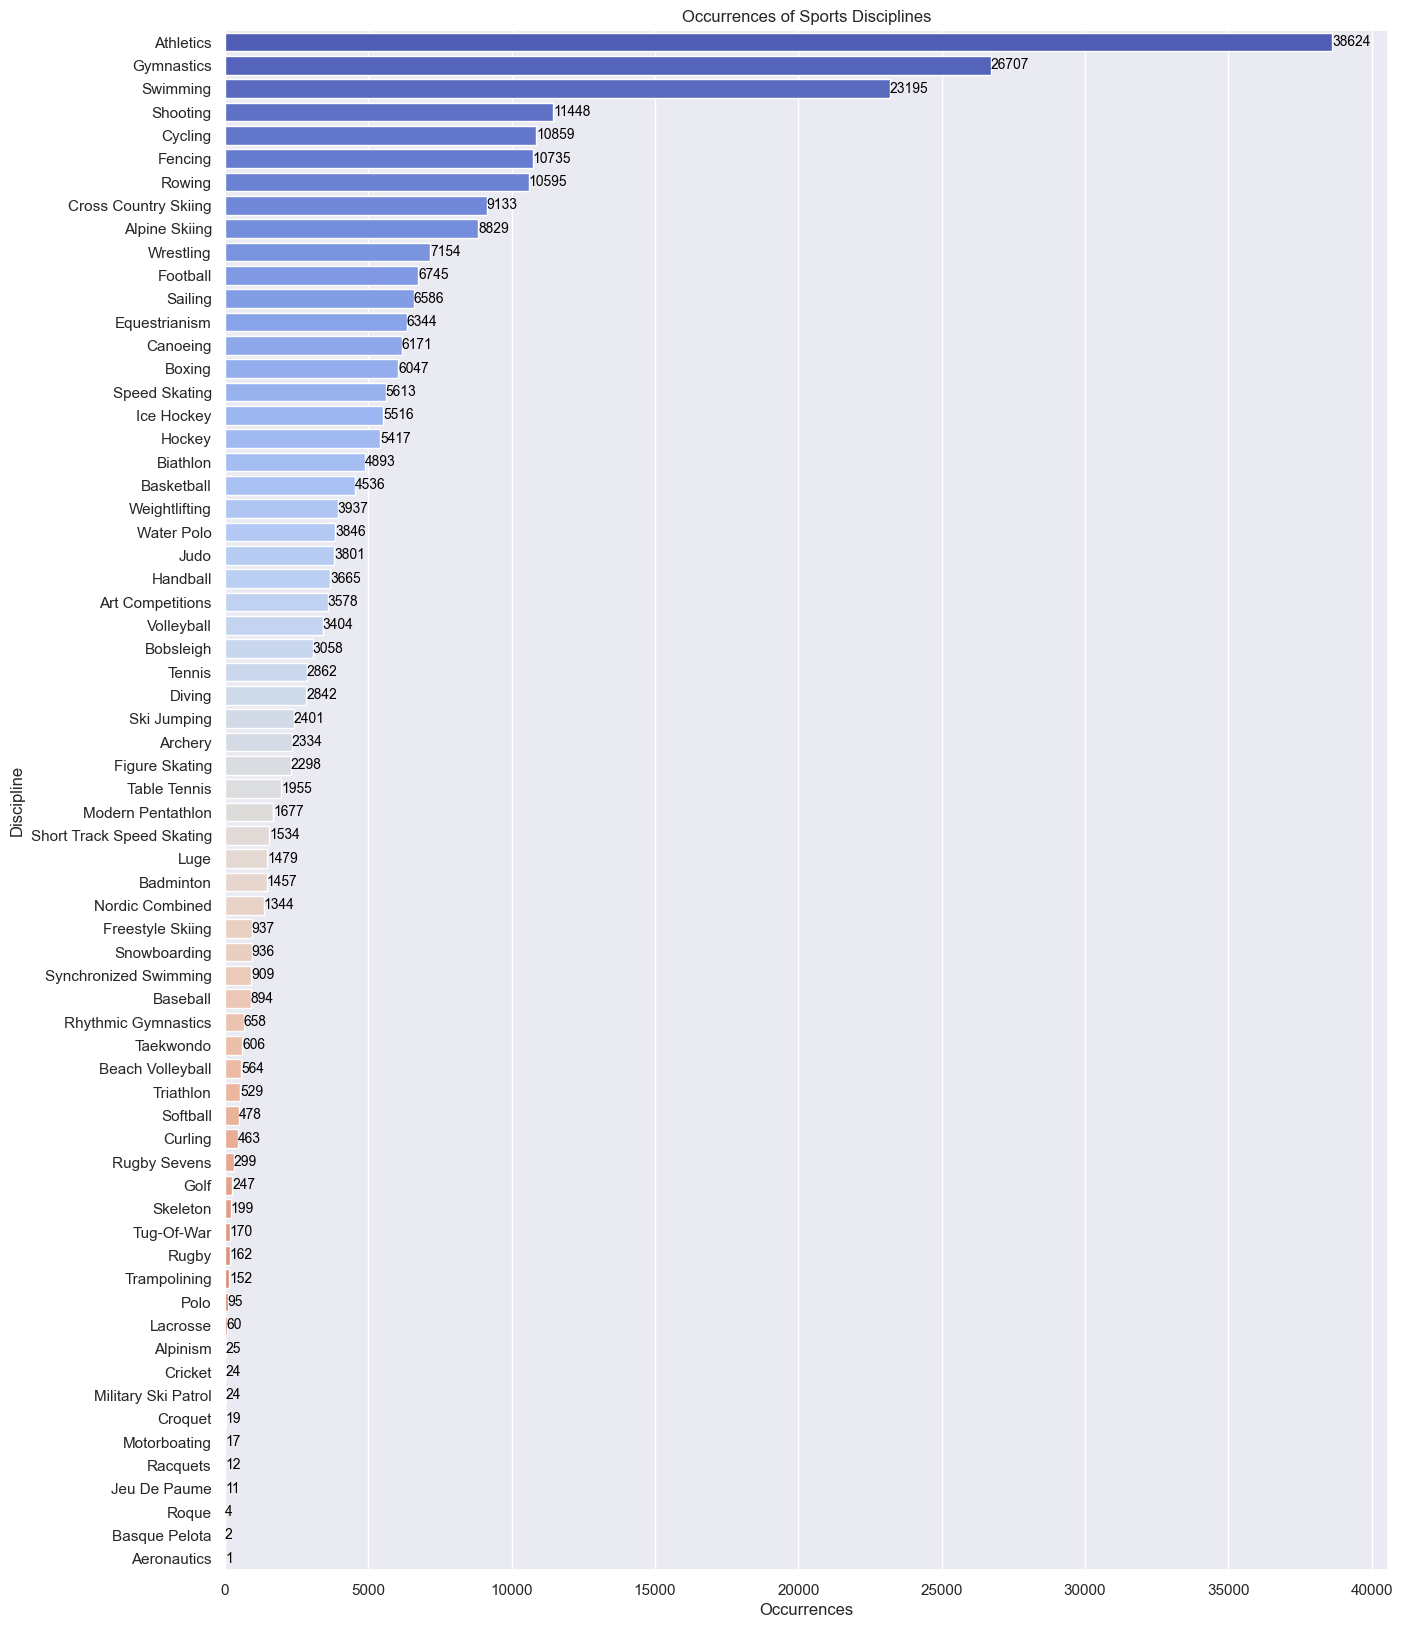

In [110]:
plt.figure(figsize=(15, 20)) 
sns.set(style="darkgrid")
graph = sns.barplot(x='Occurance', y='Discipline', data=disciplines, palette="coolwarm")

plt.xlabel("Occurrences")
plt.ylabel("Discipline")
plt.title("Occurrences of Sports Disciplines")

annotate_bars(graph, fontsize=10, color='black')


In [81]:
disciplines_summer = main[(main.Season == 'Summer')]
disciplines_summer = disciplines_summer.groupby('Sport')['Season'].count().reset_index()
disciplines_summer = disciplines_summer.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_summer.index +=1
disciplines_summer

,Sport,Season
1,Athletics,38624
2,Gymnastics,26707
3,Swimming,23195
4,Shooting,11448
5,Cycling,10859
6,Fencing,10735
7,Rowing,10595
8,Wrestling,7154
9,Football,6745
10,Sailing,6586


In [99]:
disciplines_winter = main[(main.Season == 'Winter')]
disciplines_winter = disciplines_winter.groupby('Sport')['Season'].count().reset_index()
disciplines_winter = disciplines_winter.sort_values(by='Season', ascending=False).reset_index(drop=True)
disciplines_winter.index +=1
disciplines_winter

,Sport,Season
1,Cross Country Skiing,9133
2,Alpine Skiing,8829
3,Speed Skating,5613
4,Ice Hockey,5456
5,Biathlon,4893
6,Bobsleigh,3058
7,Ski Jumping,2401
8,Figure Skating,2244
9,Short Track Speed Skating,1534
10,Luge,1479


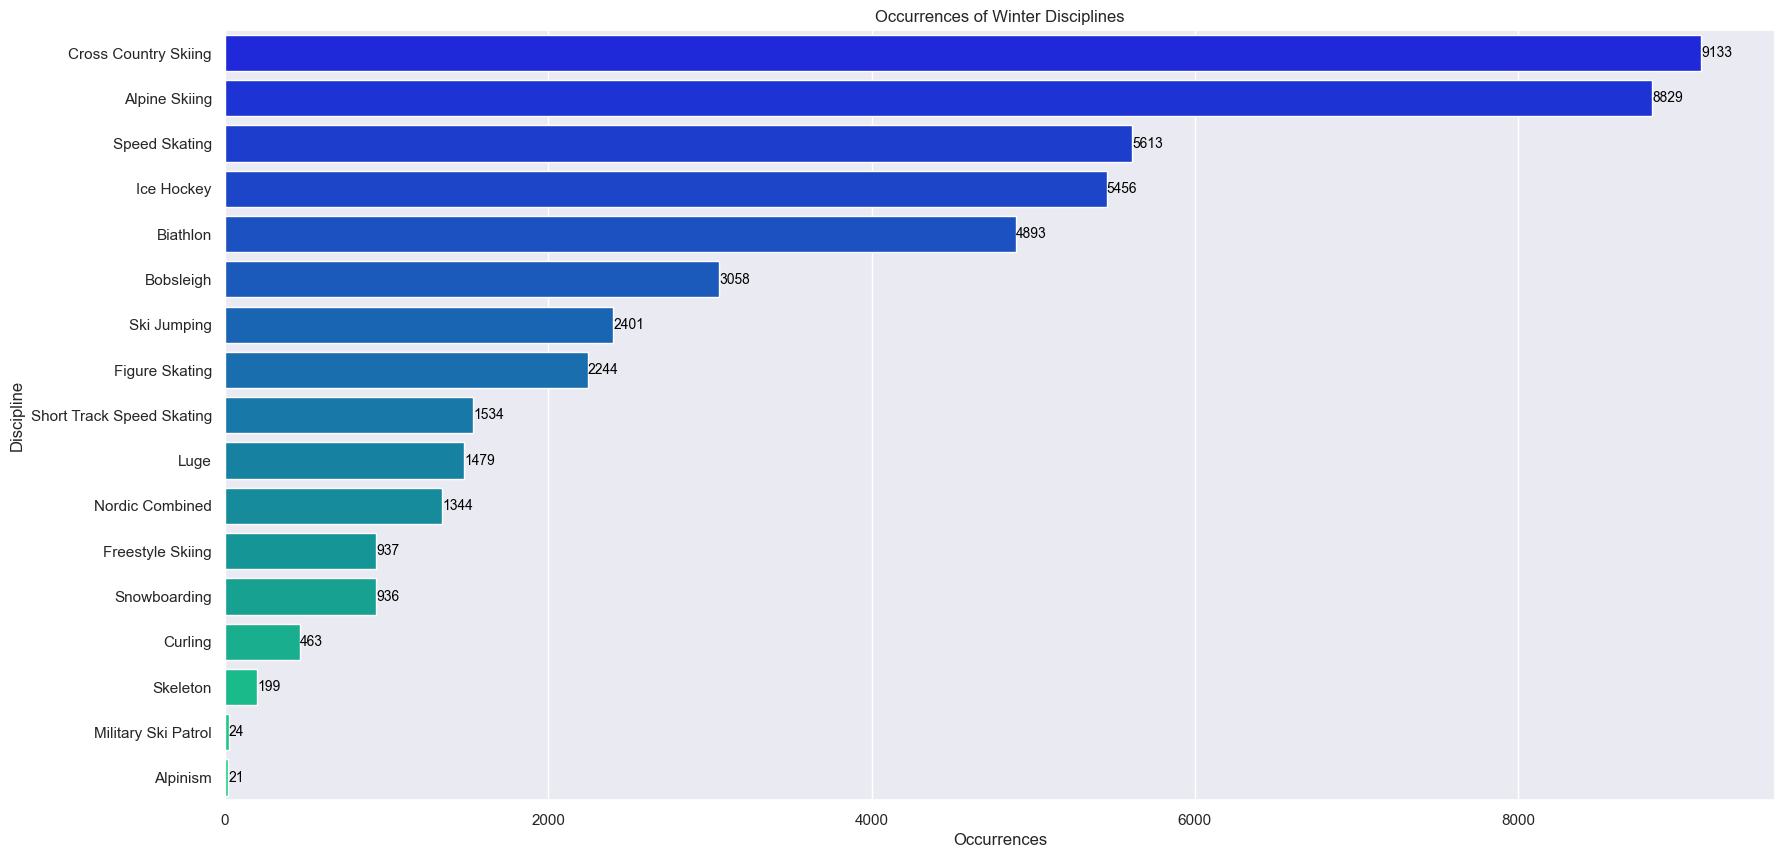

In [111]:
plt.figure(figsize=(20, 10)) 
sns.set(style="darkgrid")
graph = sns.barplot(x='Season', y='Sport', data=disciplines_winter, palette="winter")

plt.xlabel("Occurrences")
plt.ylabel("Discipline")
plt.title("Occurrences of Winter Disciplines")

annotate_bars(graph, fontsize=10, color='black')

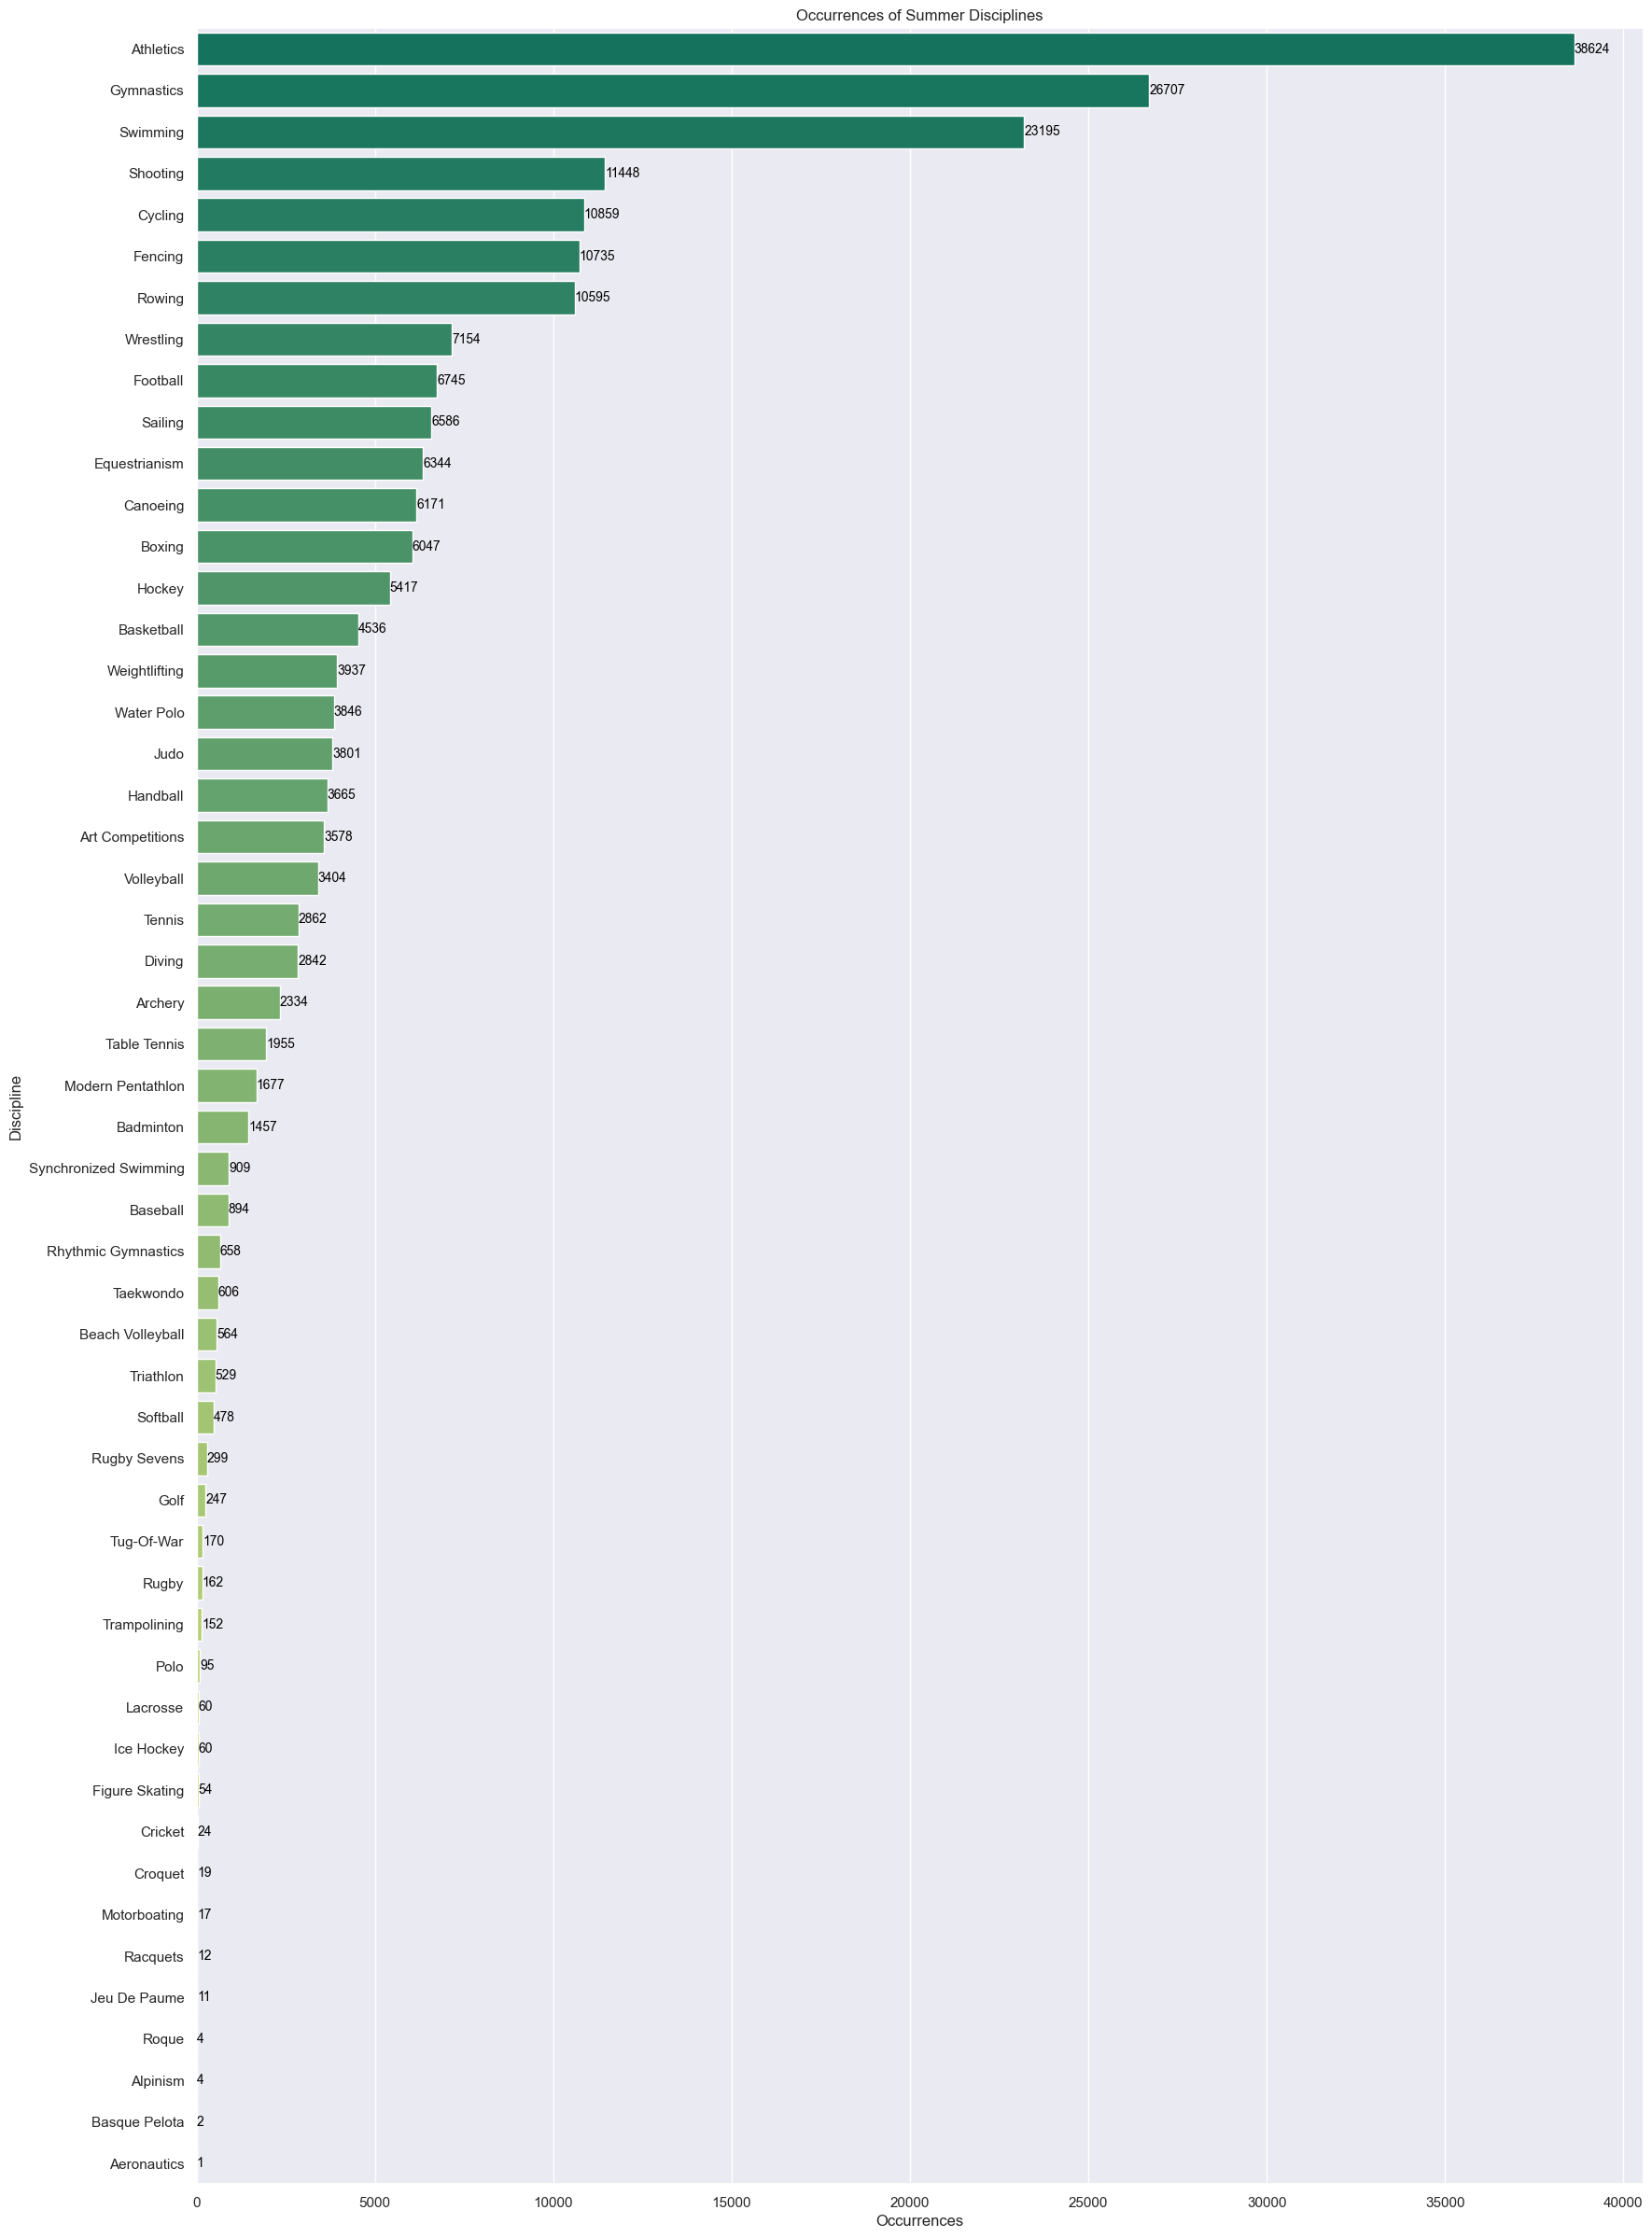

In [113]:
plt.figure(figsize=(20, 30)) 
sns.set(style="darkgrid")
graph = sns.barplot(x='Season', y='Sport', data=disciplines_summer, palette="summer")

plt.xlabel("Occurrences")
plt.ylabel("Discipline")
plt.title("Occurrences of Summer Disciplines")

annotate_bars(graph, fontsize=10, color='black')